## Plotting Basics
There are quite a few plotting libraries in Python, including matplotlib (and the sub-library matplotlib.pyplot) and seaborn. matplotlib works nicely with NumPy arrays and seaborn works nicely with pandas DataFrames.

Here, we'll use seaborn to visualize some of our inflammation data.

In [1]:
# First, we have to load pandas and seaborn
import pandas as pd
import seaborn as sns

In [2]:
# Load the inflammation data in long form
infl_data = pd.read_csv('inflammation-01_long.csv', index_col=0)

In [3]:
# Check that it loaded correctly
infl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 2399
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 2400 non-null   int64
 1   Day                2400 non-null   int64
 2   Inflammation       2400 non-null   int64
 3   High Inflammation  2400 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 77.3 KB


In [4]:
infl_data.head(3)

ID  Day  Inflammation  High Inflammation
0   0    1             0              False
1   1    1             0              False
2   2    1             0              False

### Basic line plots

We can use seaborn's `lineplot` function to plot the inflammation levels of patient 0 across the 40 days.

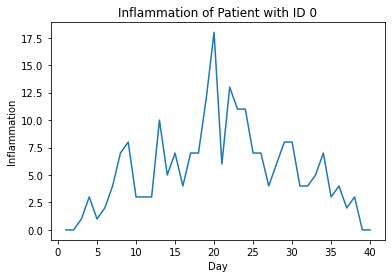

In [5]:
my_plot = sns.lineplot(x='Day', y='Inflammation', data=infl_data.loc[infl_data.ID==0])
_ = my_plot.set_title('Inflammation of Patient with ID 0')

Notice that we used the comparison operator `==` to select all the rows of patient with ID `0`. This will return indices which we can then use to index the original DataFrame with `.loc`.

We can also exclude this indexing to plot the average inflammation for each day. seaborn will automatically calculate the average and uncertainty estimates across all IDs.

Text(0.5, 1.0, 'Average inflammation across all patients')

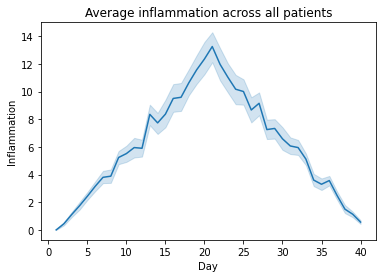

In [6]:
lineplot_alldata = sns.lineplot(x='Day', y='Inflammation', data=infl_data)
lineplot_alldata.set_title('Average inflammation across all patients')

In [7]:
fig = lineplot_alldata.get_figure()
fig.savefig('avg-infl.pdf')

If we were to create our own data, we can also use `lineplot` but in a slightly different way.

In [8]:
# Let's use numpy to generate some random data
import numpy as np
x = range(100)
y = x + np.random.normal(scale=5., size=100)

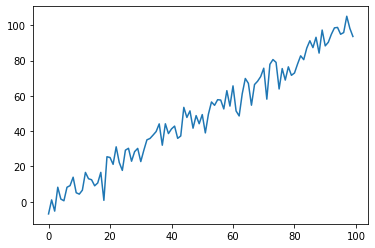

In [9]:
my_plot = sns.lineplot(x=x, y=y)

### Other Types of Visualizations
seaborn has many plotting functions. The seaborn gallery gives nice examples of many types of visualizations! Some examples include `boxplot`, `scatterplot`, and `histplot`.

<AxesSubplot:ylabel='Inflammation'>

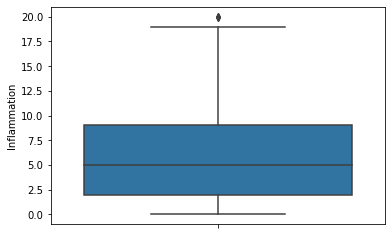

In [10]:
sns.boxplot(y='Inflammation', data=infl_data)

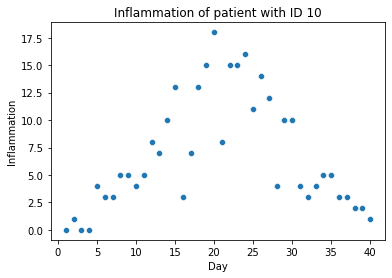

In [11]:
my_scatter = sns.scatterplot(x='Day', y='Inflammation', data=infl_data[infl_data.ID==10])
_=my_scatter.set_title('Inflammation of patient with ID 10')

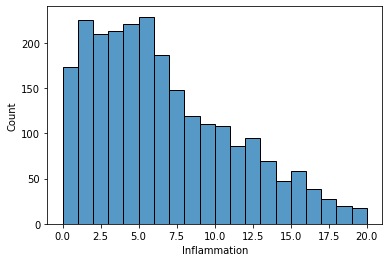

In [12]:
my_distribution = sns.histplot(x='Inflammation', data=infl_data)

seaborn also allows stratification of observations by a given column:

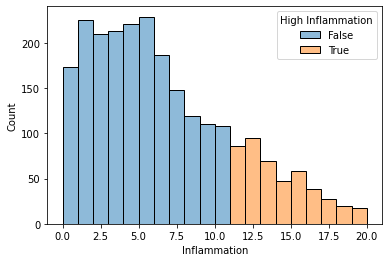

In [13]:
my_distribution = sns.histplot(x='Inflammation', hue='High Inflammation', data=infl_data)

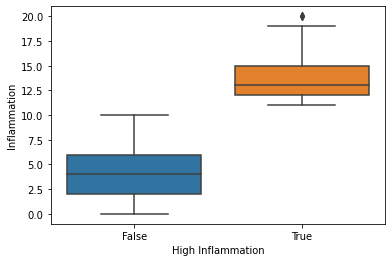

In [14]:
my_boxplot = sns.boxplot(x='High Inflammation', y='Inflammation', data=infl_data)

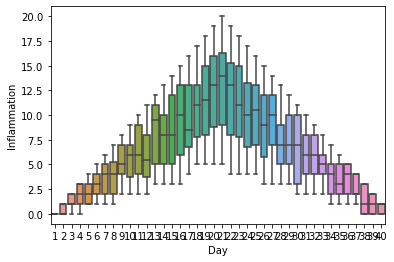

In [15]:
my_boxplot = sns.boxplot(x='Day', y='Inflammation', data=infl_data)

<AxesSubplot:xlabel='Day', ylabel='Inflammation'>

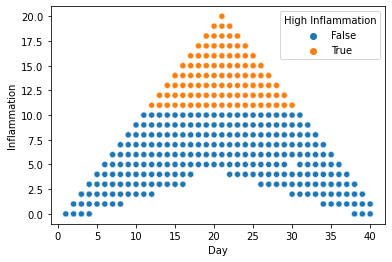

In [16]:
sns.scatterplot(x='Day', y='Inflammation', hue='High Inflammation', data=infl_data)

<AxesSubplot:xlabel='Day', ylabel='ID'>

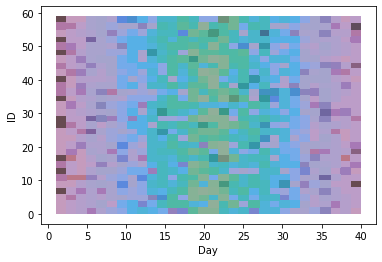

In [17]:
sns.histplot(x='Day', y='ID', hue='Inflammation', data=infl_data, palette='mako', 
             bins=30, legend=None)